In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from scipy.sparse import coo_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
def jaccard(x1, x2):
    """
    Given two numpy arrays, returns a similarity between 0 and 1. (Float)
    """
    x1 = x1.astype(np.int8)
    x2 = x2.astype(np.int8)
    intersection = (x1 & x2).sum()
    union = (x1 | x2).sum()
    similarity = intersection/union
    return similarity

In [3]:
purchase_data = pd.read_parquet("../dat/steam_purchase.parquet")

In [4]:
user_encoder = OrdinalEncoder(dtype=np.int64)
game_encoder = OrdinalEncoder(dtype=np.int64)

cleaned_set = purchase_data.set_index("game")[purchase_data.groupby("game").count().userId >= 20].reset_index()
cleaned_set["row"] = user_encoder.fit_transform(np.array(cleaned_set.userId)[:, np.newaxis])
cleaned_set["column"] = game_encoder.fit_transform(np.array(cleaned_set.game)[:, np.newaxis])

rating_matrix = coo_matrix((np.ones(shape=(len(cleaned_set),)), (np.array(cleaned_set.row), np.array(cleaned_set.column))),
           shape=((cleaned_set.row.max() + 1, cleaned_set.column.max() + 1)),
           dtype=np.int8).toarray().T

/tmp/ipykernel_674/3854202433.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_set = purchase_data.set_index("game")[purchase_data.groupby("game").count().userId >= 20].reset_index()


In [5]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='pca', random_state=0, perplexity=10).fit_transform(rating_matrix)

/home/ugurkap/miniconda3/envs/datalit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


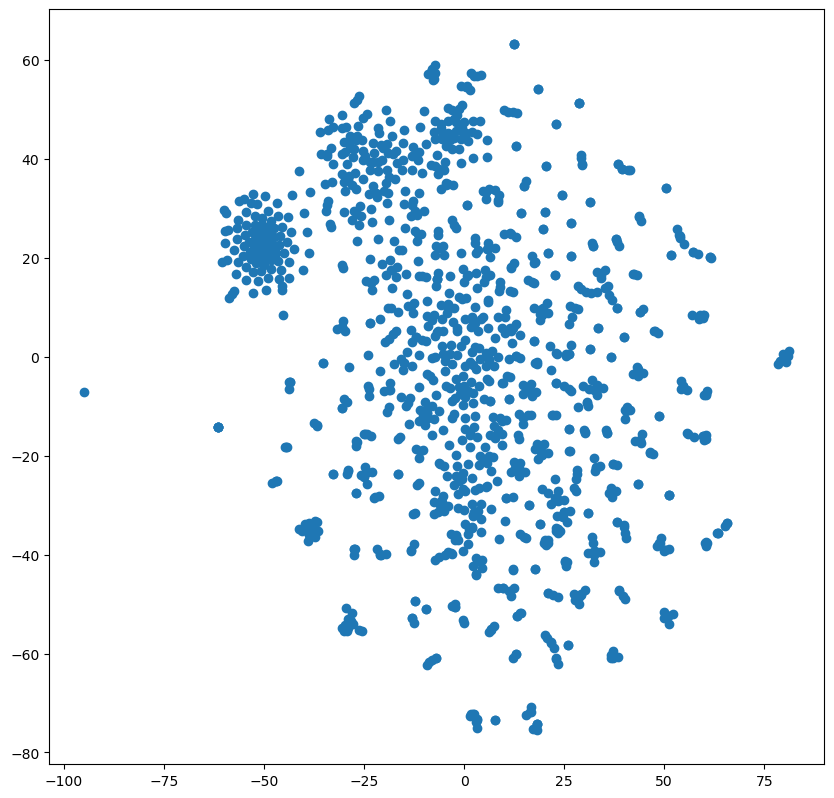

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)
ax.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.show()

We got a very surprised face.

/home/ugurkap/miniconda3/envs/datalit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/ugurkap/miniconda3/envs/datalit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/ugurkap/miniconda3/envs/datalit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/ugurkap/miniconda3/envs/datalit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of 

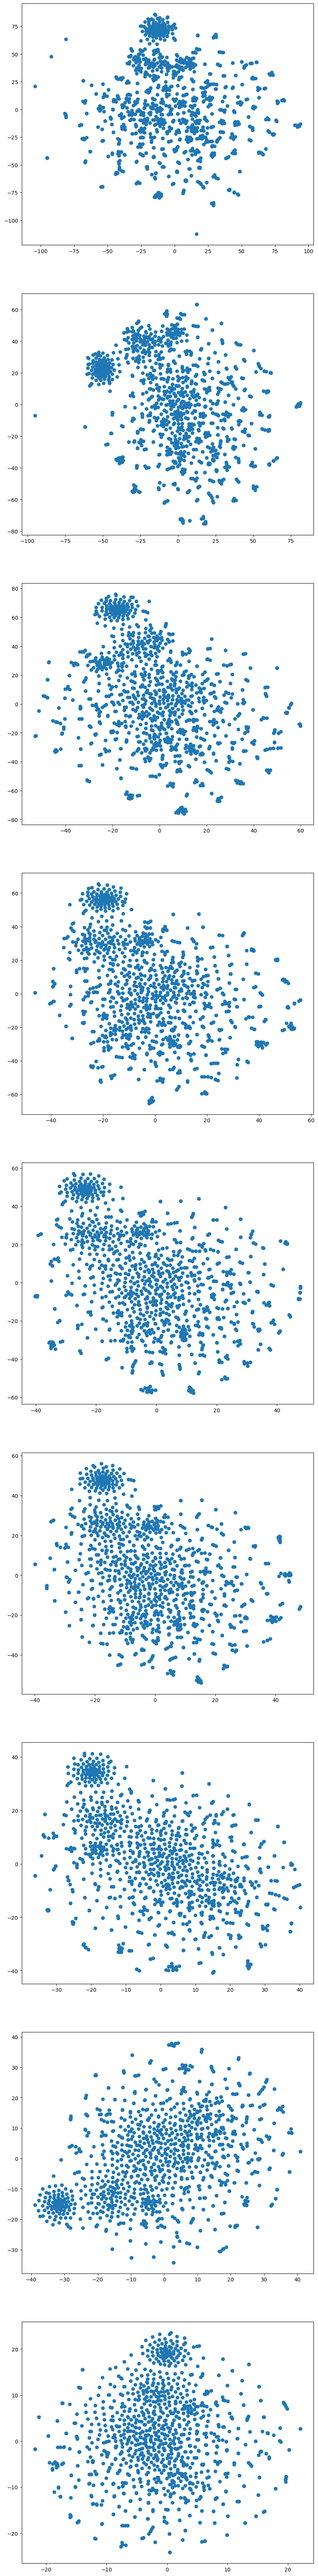

In [11]:
perplexity_values = [5, 10, 15, 20, 25, 30, 40, 50, 100]

fig, ax = plt.subplots(len(perplexity_values), 1, figsize=(10, 10 * len(perplexity_values)), dpi=100)

for i, perp in enumerate(perplexity_values):
    X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='pca', random_state=0, perplexity=perp).fit_transform(rating_matrix)
    ax[i].scatter(X_embedded[:, 0], X_embedded[:, 1])

plt.show()

/home/ugurkap/miniconda3/envs/datalit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(
/home/ugurkap/miniconda3/envs/datalit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/home/ugurkap/miniconda3/envs/datalit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.

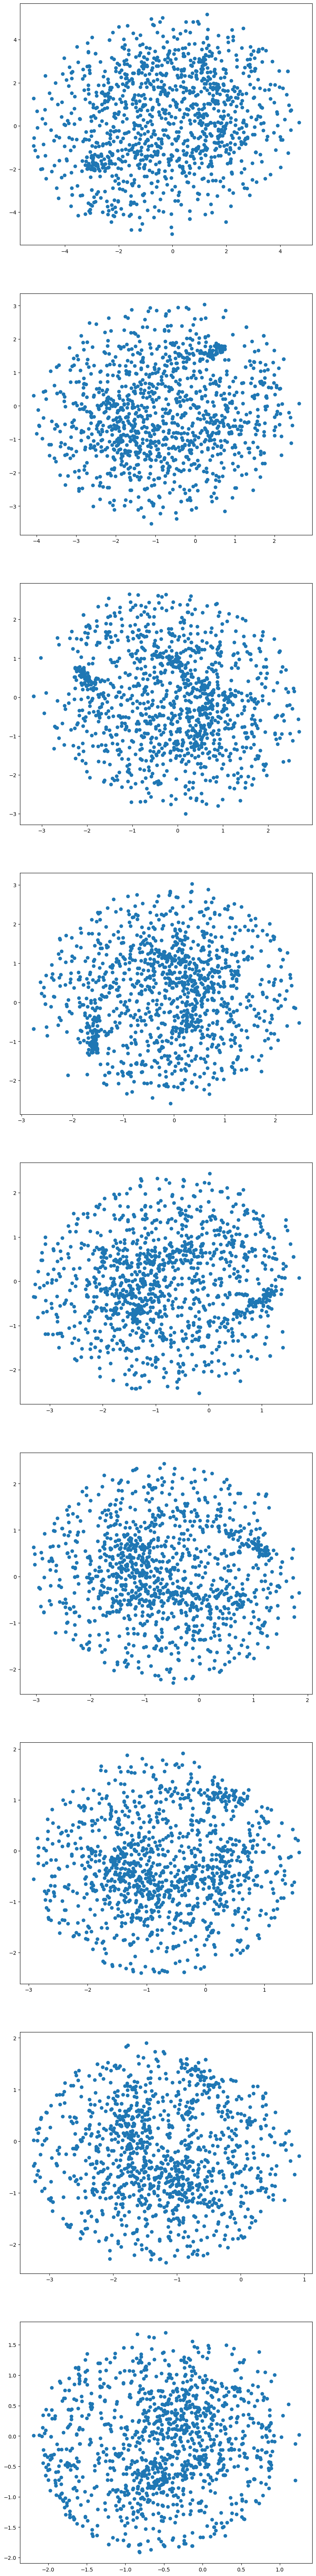

In [10]:
perplexity_values = [5, 10, 15, 20, 25, 30, 40, 50, 100]

fig, ax = plt.subplots(len(perplexity_values), 1, figsize=(10, 10 * len(perplexity_values)), dpi=100)

for i, perp in enumerate(perplexity_values):
    X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='pca', random_state=0, perplexity=perp, metric=jaccard).fit_transform(rating_matrix)
    ax[i].scatter(X_embedded[:, 0], X_embedded[:, 1])

plt.show()

/home/ugurkap/miniconda3/envs/datalit/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


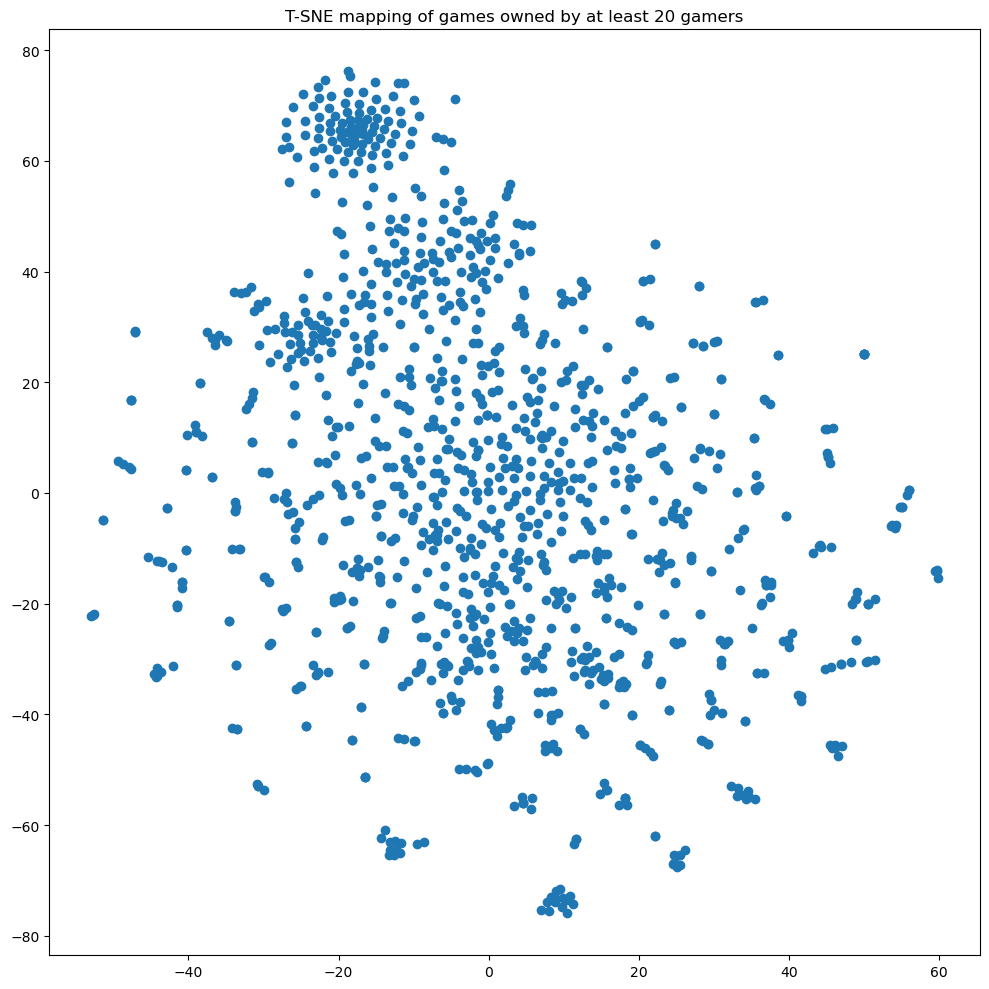

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='pca', random_state=0, perplexity=15).fit_transform(rating_matrix)
ax.scatter(X_embedded[:, 0], X_embedded[:, 1])

ax.set_title("T-SNE mapping of games owned by at least 20 gamers")
fig.tight_layout()
plt.show()

Now, the next step is to figure out if this graph makes any sense. For this, we need to review clusters generated by the T-SNE.